In [1]:
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
pop_data = pd.DataFrame(pd.read_excel("PEFR_asthma_114_medinfo_07.15.xlsx"))
pop_data.tail()

,ID,BCODE,UID1,UID2,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,address
109,SB-135,14000819,BC3296833,NaN,79,M,NS,0,163,67,25.217359,1.741726,무직,부천시 원미구 도당동 137-4
110,SB-137,14000774,BC3300701,NaN,76,F,NS,0,160,66,25.781250,1.712698,주부,경기도 부천시 부흥로 71
111,SB-139,14000670,BC3334855,NaN,50,F,ES,20,162,64,24.386526,1.697056,건설업,부천시 원미구 중2동 그린타운 한신A
112,SB-140,14000334,BC3309595,NaN,69,F,ES,15,170,72,24.913495,1.843909,건설업,부천시 원미구 중3동 중흥마을
113,SB-141,14000223,BC3294749,NaN,71,F,NS,0,162,73,27.815882,1.812457,기타,부천시 오정구 여월동 8-54


In [3]:
# %pip install deep_translator

In [4]:
# translate Korean text to English for occupation and address columns
def translate_text(text):
    if pd.isna(text):
        return text
    try:
        return GoogleTranslator(source='ko', target='en').translate(text)
    except:
        return text  # Return original text if translation fails

pop_data['occupation_en'] = pop_data['occupation'].apply(translate_text )
pop_data['address_en'] = pop_data['address'].apply(translate_text )

Missing values:

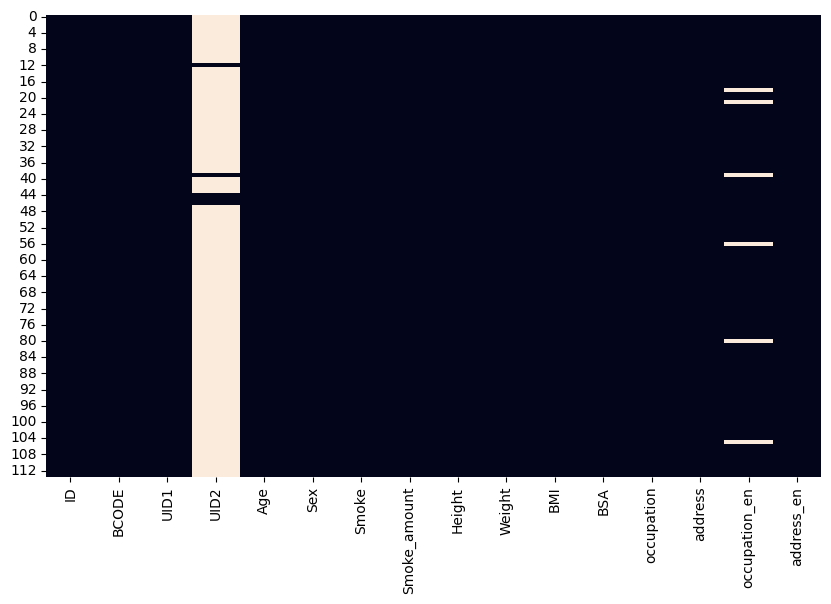

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(pop_data.isnull(), cbar=False)
plt.show()

In [10]:
n= pop_data['occupation_en'].unique()
print("number of unique occupations:" ,len(n))

number of unique occupations: 38


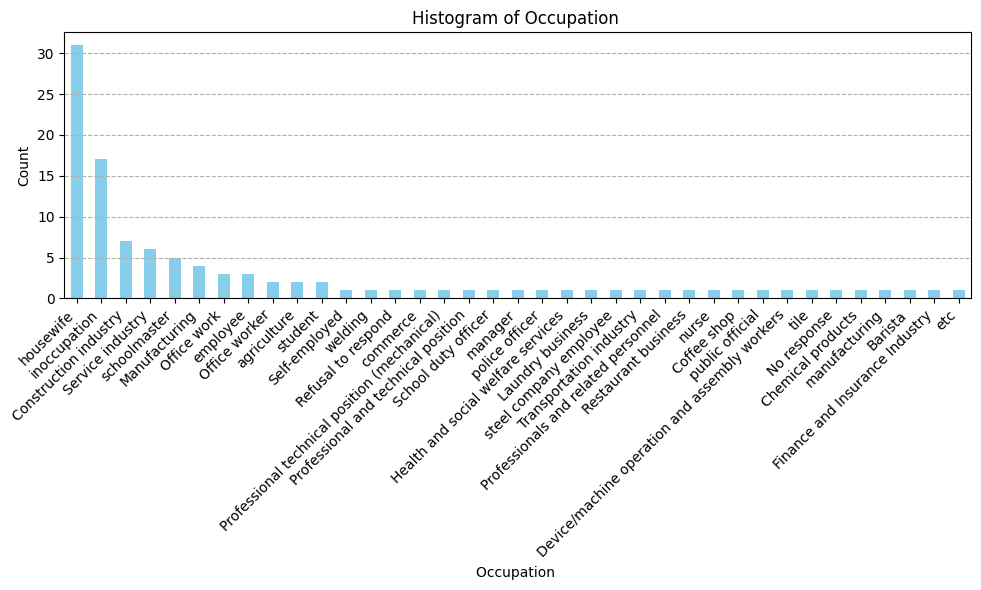

In [11]:
occupation_counts = pop_data['occupation_en'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Histogram of Occupation ')
plt.xlabel('Occupation ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [12]:
# Mapping dictionary
occupation_mapping = {
    'housewife': 'Housewife',
    'Manufacturing': 'Manufacturing',
    'tile': 'Construction',
    'Construction industry': 'Construction',
    'Office worker': 'Office',
    'Office work': 'Office',
    'employee': 'Office',
    'schoolmaster': 'Education',
    'teacher': 'Education',
    'Finance and Insurance Industry': 'Finance',
    'self-employment': 'Other',
    'inoccupation': 'Unemployed',
    'welding': 'Manufacturing',
    'Service industry': 'Service Industry',
    'Barista': 'Service Industry',
    'agriculture': 'Agriculture',
    'chemicals': 'Manufacturing',
    'student': 'Education',
    'Device/machine operation and assembly workers': 'Manufacturing',
    'public official': 'Office',
    'coffee shop': 'Service Industry',
    'nurse': 'Healthcare',
    'Restaurant business': 'Service Industry',
    'Professionals and related personnel': 'Office',
    'Transportation industry': 'Transportation',
    'steel company employee': 'Manufacturing',
    'Laundry business': 'Service Industry',
    'Health and social welfare services': 'Healthcare',
    'police officer': 'Service Industry',
    'manager': 'Office',
    'School duty officer': 'Education',
    'Professional and technical position': 'Office',
    'Refusal to respond': 'Other',
    'construction industry': 'Construction',
    'commerce': 'Finance',
    'etc': 'Other',
    'No response': 'Other',
}

# Example function to apply mapping
def categorize_occupation(occupation):
    return occupation_mapping.get(occupation, 'Other')

# Applying to your DataFrame
pop_data['occupation_category'] = pop_data['occupation_en'].apply(categorize_occupation)


In [13]:
pop_data['occupation_category'].value_counts()

occupation_category
Housewife           31
Unemployed          17
Other               14
Office              12
Service Industry    10
Construction         8
Education            8
Manufacturing        7
Finance              2
Agriculture          2
Healthcare           2
Transportation       1
Name: count, dtype: int64

In [14]:
le = LabelEncoder()

# Fit and transform the Occupation column
pop_data['occupation_label'] = le.fit_transform(pop_data['occupation_category'])



In [15]:
print(pop_data['occupation_label'].unique())

[ 5  6  1  8  7  2  3 11  9  0  4 10]


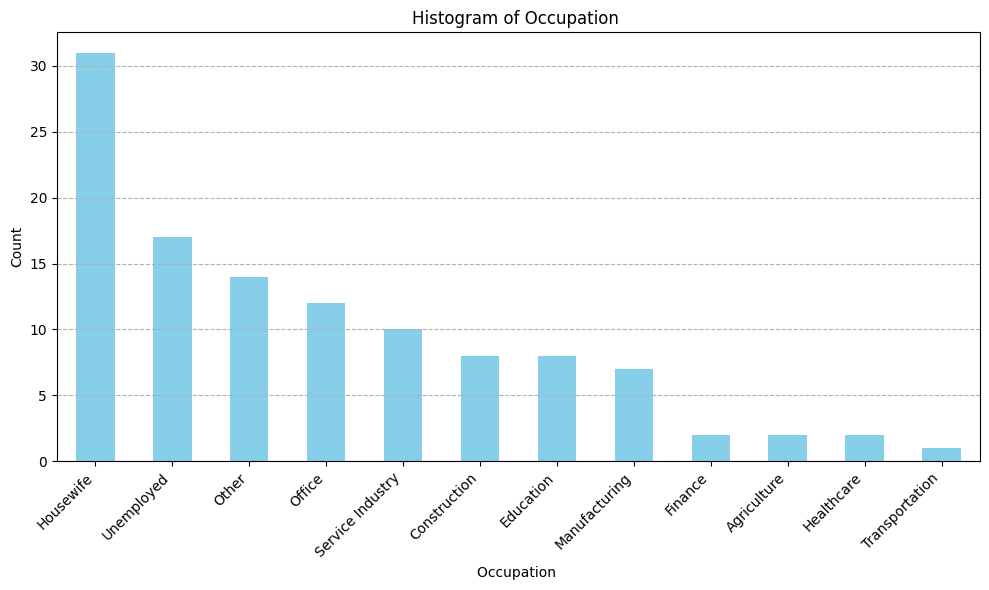

In [16]:
occupation_categ = pop_data['occupation_category'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
occupation_categ.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Histogram of Occupation ')
plt.xlabel('Occupation ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [17]:
pop_data.to_excel("translated.xlsx", index=False)